In [1]:
import os
import errno
import os.path as op
from pyacwereg import viz
%matplotlib inline

out_dir = op.abspath('../../Publications/2015-NeuroImage/figures')

try:
    os.makedirs(out_dir)
except OSError as exc: # Python >2.5
    if exc.errno == errno.EEXIST and os.path.isdir(out_dir):
        pass
    else: raise


'/home/oesteban/workspace/ACWE-Reg/Publications/2015-NeuroImage/figures/figure01.pdf'

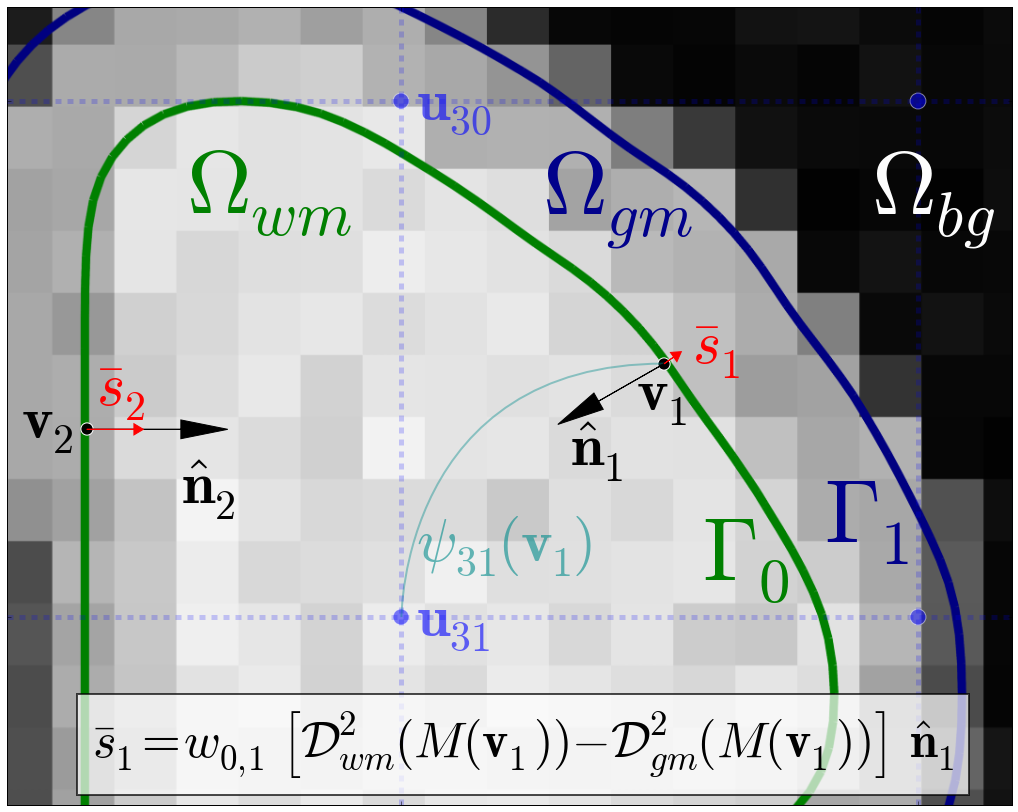

In [2]:
reload(viz)
viz.regseg_fig01('figures/phantom-closeup.png', op.join(out_dir, 'figure01.pdf'))

In [ ]:
import os.path as op
import nibabel as nb
import numpy as np
import os
import seaborn as sn
import pandas as pd
from pyacwereg import viz
from scipy.linalg import sqrtm

exp_dir = '/media/data/TMI_mirror/phantom/debug'
im1 = nb.load(op.join(exp_dir, 'comps_umsk_reference_lev0.nii.gz_cmp0.nii.gz')).get_data().astype(np.float32).reshape(-1)

im2 = nb.load(op.join(exp_dir, 'comps_umsk_reference_lev0.nii.gz_cmp1.nii.gz')).get_data().astype(np.float32).reshape(-1)

seg = nb.load(op.join(exp_dir, 'gold_seg.nii.gz')).get_data().reshape(-1)

In [ ]:
reload(viz)
myplot, o = viz.jointplot_data(im1, im2, seg, labels=['WM', 'GM', 'BG'], f1name='T1w', f2name='T2w',
                               out_file='/home/oesteban/Dropbox/My Publications/2015-NeuroImage/supplemental/phantom-model-kde.pdf')

In [ ]:
reload(viz)

lims = myplot.ax_joint.axis()

xlims = (lims[0], lims[1])
ylims = (lims[2], lims[3])

locs = [ (67.68510000000001, 67.74580), (813.5069999999999, 5067.380), (1064.570, 3432.320) ]
covs = [[ 1107.430, 4.984860, 4.984860, 1111.160 ],
        [ 5705.010, 2663.440, 2663.440, 182251 ],
        [  2625.350, -24.54710, -24.54710, 3588.710 ]]
   
o = viz.jointplot_gmm(locs, covs, xlims=xlims, ylims=ylims, labels=['BG', 'GM', 'WM'],
                      xname='T1w', yname='T2w',
                      out_file='/home/oesteban/Dropbox/My Publications/2015-NeuroImage/supplemental/phantom-model-estimated.pdf')

In [ ]:
reload(viz)

lims = myplot.ax_joint.axis()

xlims = (lims[0], lims[1])
ylims = (lims[2], lims[3])

locs = [ (68, 69), (817, 5263), (1065, 3430) ]
covs = [[ 4938.870, 30350.30, 30350.30, 260793 ],
        [  5717.220, 3346.830, 3346.830, 220521 ],
        [ 2625.530, -25.54650, -25.54650, 3594.110 ]]

o = viz.jointplot_gmm(locs, covs, xlims=xlims, ylims=ylims, labels=['BG', 'GM', 'WM'],
                      xname='T1w', yname='T2w')

In [ ]:
reload(viz)

locs = [(534.0880, 880.9040), # th
        (361.1170, 1007.40),  # dgm, csf
        (776.1830, 783.370),  # stem
        (812.4059999999999, 902.4020), # wm
        (407.4050, 892.1570), # cbGM
        (334.630, 1156.820)]  # gm
covs = [[27543.40, -8387.190000000001, -8387.190000000001, 5010.290],
        [18778.20, -3622.330, -3622.330, 7400.40],
        [29537.40, -7803.050, -7803.050, 4991.950],
        # [38316.30, -1.0e8, - 1.0e8, 7342.090],
        [40344.50, -13649.60, -13649.60, 11331],
        [5474.370, -2476.580, -2476.580, 8255.410],
        [8018.20, -2429.980, -2429.980, 10284.60]]
   
o = viz.jointplot_gmm(locs, covs, xlims=(0, 1500), ylims=(600, 1500), labels=['Th', 'dGM+CSF', 'Stem', 'WM', 'cbGM', 'GM' ],
                      xname='fractional anisotropy (FA)', yname='apparent diffusion coefficient (ADC)',
                      out_file='/home/oesteban/Dropbox/My Publications/2015-NeuroImage/supplemental/realdata-model-estimated.pdf')

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pyacwereg import viz
import os.path as op

In [8]:
    import os.path as op
    import nibabel as nb
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sn
    import pandas as pd

    fa = nb.load(fa_path).get_data().astype(np.float32).reshape(-1)
    md = nb.load(md_path).get_data().astype(np.float32).reshape(-1)
    seg = nb.load(seg_path).get_data().astype(np.uint8).reshape(-1)
    msk = nb.load(msk_path).get_data().astype(np.uint8).reshape(-1)
    
    labels=[r'$\Omega_{Tha}$', r'$\Omega_{VdGM}$', r'$\Omega_{bst}$', r'$\Omega_{WM}$',
            r'$\Omega_{cbGM}$', r'$\Omega_{GM}$', 'do-not-show']
    xlabel='fractional anisotropy (FA)'
    ylabel='apparent diffusion coefficient (ADC)'
    xlims=(0, 1500)
    ylims=(600, 1500)
    huelabel = 'tissue'

    if xlims is None:
        xlims = (fa.min(), fa.max())

    if ylims is None:
        ylims = (md.min(), md.max())

    md[md < ylims[0]] = np.nan
    md[md > ylims[1]] = np.nan

    if labels is None:
        labels = ['Label%02d' % i for i in range(seg.max() + 1)]

    df_pieces = []
    for i, l in zip(np.unique(seg), labels):
        idxs = np.where((seg == i) & (msk > 0))
        fa_f = fa[idxs]
        md_f = md[idxs]
        d = {xlabel: fa_f,
             ylabel: md_f,
             huelabel: [l] * len(fa_f)}
        df_pieces.append(pd.DataFrame(d))

    df = pd.concat(df_pieces).sample(frac=.01, replace=True)

    df = df[df.tissue != 'do-not-show']
    df

,apparent diffusion coefficient (ADC),fractional anisotropy (FA),tissue
192111,890,386,$\Omega_{WM}$
170697,1072,214,$\Omega_{GM}$
216246,1083,106,$\Omega_{GM}$
19077,809,1041,$\Omega_{WM}$
90578,1143,170,$\Omega_{GM}$
63764,NaN,365,$\Omega_{cbGM}$
97767,833,183,$\Omega_{WM}$
2770,760,487,$\Omega_{Tha}$
3838,1141,191,$\Omega_{GM}$
17927,720,1088,$\Omega_{WM}$


In [4]:
gold_dir = '/media/data/TMI_mirror/experiments/data/gold'
regseg_dir = '/media/data/TMI_mirror/experiments/data/regseg'
fa_path = op.join(regseg_dir, 'fa.nii.gz')
md_path = op.join(regseg_dir, 'md.nii.gz')
msk_path = op.join(regseg_dir, 'mask.nii.gz')
seg_path = op.join(regseg_dir, 'segment.nii.gz')

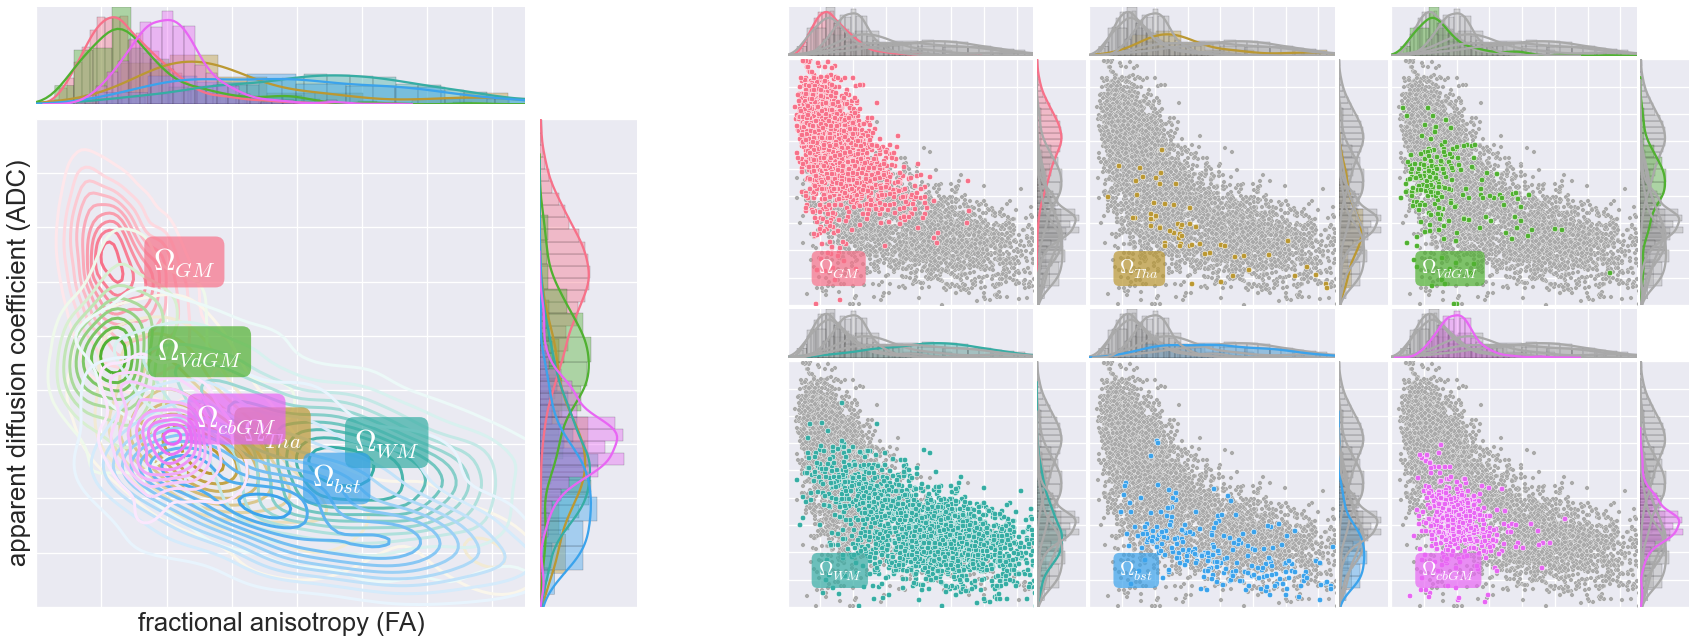

In [5]:
reload(viz)
g = viz.jointplot_real(fa_path, md_path, seg_path, msk_path,
                       labels=[r'$\Omega_{Tha}$', r'$\Omega_{VdGM}$', r'$\Omega_{bst}$', r'$\Omega_{WM}$',
                               r'$\Omega_{cbGM}$', r'$\Omega_{GM}$', 'do-not-show'],
                       xlabel='fractional anisotropy (FA)',
                       ylabel='apparent diffusion coefficient (ADC)',
                       xlims=(0, 1500), ylims=(600, 1500), out_file='/home/oesteban/Dropbox/My Publications/2015-NeuroImage/supplemental/realdata-regseg.pdf')

In [4]:
import os
import os.path as op
from pyacwereg import viz
import pandas as pd

In [ ]:
exp_dir = '/scr/data/Neuro-Databases/TMI2014/experiments/NeuroImage2/REGSEG/_bmap_id_001_subject_id_HCP100307/ACWERegistration'
df, data = parse_log(op.join(exp_dir, 'regseg.log'))

In [ ]:
exp_dir = op.join( os.getenv('NEURO_DATA_HOME', os.getenv('HOME')), 'MRM2014', 'tmp_tmi', 'HCP_MRM2014')
exp_dir = '/home/oesteban/tmp/acweregphantom'
df, data = parse_log(op.join(exp_dir, 'experimental.log'))

In [ ]:
levels = data['levels']
desc = data['description']

In [ ]:
for l in levels:
    print l[-1]['summary']['stop_msg']

In [ ]:
import os
import os.path as op
from pyacwereg.interfaces import acwereg as r
exp_dir = '/scr/data/Neuro-Databases/TMI2014/experiments/NeuroImage3/REGSEG/_subject_id_HCP100307/ACWERegistration'
# exp_dir = '/media/data/NeuroImage2015/experiments/profiling'
intf = r.ACWEReport(in_log=op.join(exp_dir, 'regseg.log'), out_file='/home/oesteban/tmp/realdata.pdf')
intf.run()

In [ ]:
import os
import os.path as op
from pyacwereg.interfaces import acwereg as r
reload(r)

exp_dir = '/scr/data/Neuro-Databases/TMI2014/phantom/eclipse'
intf = r.ACWEReport(in_log=op.join(exp_dir, 'regseg.log'), out_file='/home/oesteban/tmp/phantom2.pdf')
intf.run()

In [ ]:
import os
import os.path as op
from pyacwereg.interfaces import acwereg as r
reload(r)

exp_dir = '/media/data/NeuroImage2015/experiments/profiling'
intf = r.ACWEReport(in_log=op.join(exp_dir, 'regseg.log'), out_file='/home/oesteban/tmp/real_msk.pdf')
intf.run()

In [ ]:
import os
import os.path as op
from pyacwereg import viz

exp_dir = '/media/data/NeuroImage2015/phantoms/Experiment001'
# exp_dir = '/scr/data/Neuro-Databases/TMI2014/phantom'
csv_file = op.join(exp_dir, 'results.csv')

In [ ]:
from scipy import stats as sst
import scipy  
import scikits.bootstrap as bootstrap
import pandas as pd
orig_df = pd.read_csv(csv_file).drop_duplicates(subset=['repetition', 'model_type', 'resolution', 'surf_id'])
del orig_df['Unnamed: 0']
# df.describe()

results = {}

for res in ['hi', 'lo']:
    df = orig_df[orig_df.resolution == res]
    resval = 2.0 if res == 'lo' else 1.0
    
    results[res] = { 'aggregated': {}}
    results[res]['aggregated']['normality'] = 'p=%g' % sst.shapiro(df.surfdist_avg)[1]
    results[res]['aggregated']['accuracy'] = 'p=%g' % sst.wilcoxon(df.surfdist_avg - resval)[1]
    results[res]['aggregated']['cohens_d'] = df.surfdist_avg.mean() / df.surfdist_avg.std()
    results[res]['aggregated']['CI0'], results[res]['aggregated']['CI1'] = bootstrap.ci(data=df.surfdist_avg, statfunction=scipy.median)
    
    for t in ['gyrus', 'ball', 'L', 'box']:
        results[res][t] = {}
        ndf = df[df.model_type == t]
        sig = (.001 / len(ndf.surfdist_avg))

        normtest = sst.shapiro(ndf.surfdist_avg)[1]
        results[res][t]['normality'] = 'p=%g' % normtest
        
        rstest = sst.wilcoxon(ndf.surfdist_avg - resval)[1]
        results[res][t]['accuracy'] = 'p=%g' % rstest
        results[res][t]['cohens_d'] = ndf.surfdist_avg.mean() / ndf.surfdist_avg.std()
        results[res][t]['CI0'], results[res][t]['CI1'] = bootstrap.ci(data=ndf.surfdist_avg, statfunction=scipy.median)

        
resdf_hi = pd.DataFrame(results['hi'])
resdf_low = pd.DataFrame(results['lo'])
resdf_low

In [ ]:
resdf_hi

In [5]:
import os
import os.path as op
from pyacwereg import viz

exp_dir = '/media/data/NeuroImage2015/phantoms/Experiment001'
# exp_dir = '/scr/data/Neuro-Databases/TMI2014/phantom'
csv_file = op.join(exp_dir, 'results.csv')
reload(viz)
g2 = viz.phantom_errors(csv_file, out_file='/home/oesteban/Dropbox/My Publications/2015-NeuroImage/figures/figure03-c.pdf')

ImportError: cannot import name doccer

In [ ]:
from glob import glob
from pyacwereg import viz
import os.path as op
from pyacwereg.interfaces import utility as piu

exp_dir = '/scr/data/Neuro-Databases/TMI2014/experiments/NeuroImage3/_subject_id_HCP100307/ExportREGSEG'
files = sorted(glob(op.join(exp_dir, '*.png')))


In [ ]:
reload(piu)

f = piu.TileSlicesGrid()
f.inputs.in_reference = ['/home/oesteban/tmp/slices_gridplot0.pdf', '/home/oesteban/tmp/slices_gridplot1.pdf']
f.inputs.in_competing = ['/home/oesteban/tmp/slices_gridplot1.pdf', '/home/oesteban/tmp/slices_gridplot0.pdf']
print f.cmdline

In [ ]:
reload(viz)
# g = viz.slices_gridplot(files, size=(5, 5), discard=2, view=['axial', 'coronal', 'sagittal'])
g = viz.slices_gridplot(files, slices=[38, 48, 57, 67, 76, 86], view='sagittal', label='regseg')

In [ ]:
reload(piu)

f = piu.SlicesGridplot()
f.inputs.in_files = files
f.inputs.slices = [38, 48, 57, 67, 76, 86]
f.inputs.out_file = '/home/oesteban/tmp/slices_gridplot'
f.inputs.label = ['regseg', 'regseg']
f.inputs.view = ['axial', 'sagittal']
r = f.run()
print r.outputs

In [ ]:
import os
import os.path as op
from pyacwereg import viz
import pandas as pd

exp_dir = '/scr/data/Neuro-Databases/TMI2014/experiments'

df = pd.concat([pd.read_csv(op.join(exp_dir, f)) for f in ['NeuroImage3/results.csv', 'NeuroImage3Ceo/results.csv']])
# df = pd.concat([pd.read_csv(op.join(exp_dir, f)) for f in ['NeuroImage3/results.csv']])
df = df.drop_duplicates(subset=['subject_id', 'method']).reset_index(drop=True)
del df['Unnamed: 0']

csv_file = op.join(exp_dir, 'aggregate.csv')

df.to_csv(csv_file)

In [ ]:
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats as sst

regsegdf = df[df.method=='REGSEG'].reset_index(drop=True)
t2bdf = df[df.method=='T2B'].reset_index(drop=True)

for i in range(6):
    rgsCIs = bootstrap.ci(data=regsegdf['surf_dist_%d' % i], statfunction=scipy.mean)
    t2bCIs = bootstrap.ci(data=t2bdf['surf_dist_%d' % i], statfunction=scipy.mean)
    f_val, p_val = sst.f_oneway(regsegdf['surf_dist_%d' % i], t2bdf['surf_dist_%d' % i])
    
    print 'regseg CI Surf %d = [ %.2f - %.2f]' % (i, rgsCIs[0], rgsCIs[1])
    print 't2b CI Surf %d = [ %.2f - %.2f]' % (i, t2bCIs[0], t2bCIs[1])
    print 'ANOVA f-stat, p-value = (%.2f/%.2g)' % (f_val, p_val)
    
    f_val, p_val = sst.kruskal(regsegdf['surf_dist_%d' % i], t2bdf['surf_dist_%d' % i])
    print 'KW H-test H-stat, p-value = (%.2f/%.2g)' % (f_val, p_val)

rgsCIs = bootstrap.ci(data=regsegdf[['surf_dist_1','surf_dist_3', 'surf_dist_5']].values.reshape(-1), statfunction=scipy.mean)
t2bCIs = bootstrap.ci(data=t2bdf[['surf_dist_1','surf_dist_3', 'surf_dist_5']].values.reshape(-1), statfunction=scipy.mean)
f_val, p_val = sst.f_oneway(regsegdf[['surf_dist_1','surf_dist_3', 'surf_dist_5']].values.reshape(-1), t2bdf[['surf_dist_1','surf_dist_3', 'surf_dist_5']].values.reshape(-1))
    
print 'regseg CI aggregated = [ %.2f - %.2f]' % (rgsCIs[0], rgsCIs[1])
print 't2b CI aggregated = [ %.2f - %.2f]' % (t2bCIs[0], t2bCIs[1])
print 'ANOVA f-stat, p-value = (%.2f/%.2g)' % (f_val, p_val)

f_val, p_val = sst.kruskal(regsegdf[['surf_dist_1','surf_dist_3', 'surf_dist_5']].values.reshape(-1), t2bdf[['surf_dist_1','surf_dist_3', 'surf_dist_5']].values.reshape(-1))
print 'KW H-test H-stat, p-value = (%.2f/%.2g)' % (f_val, p_val)

In [ ]:
reload(viz)
viz.realdata_errors(csv_file, out_file='/home/oesteban/Dropbox/My Publications/2015-NeuroImage/figures/figure05-b.pdf')